In [1]:
%matplotlib inline
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# PyTorchでのデータセットを扱う基本要素
PyTorchには、DatasetとDataLoaderという概念があり、ミニバッチ麦秋やデータのシャッフル、さらには並列処理を簡単に行えるようになっている
- `torch.utils.data.Dataset` : TensorDatasetのようなPyTorchで提供されているクラスを含む抽象インタフェース。メソッドとして`__len__`や`__getitem__`を保持している
- `torch.utils.data.DataLoader` : 任意の`Dataset`を受け取り、データのバッチを返すイテレータを生成することができる

## Datasetの読み込み

In [2]:
train_data = torchvision.datasets.CIFAR10(
    # ディレクトリが存在するデータセットのrootディレクトリ
    # または、downloadがTrueに設定されている場合の保存先のデータセットのrootディレクトリ
    root = "../data",
    # train : Trueの場合、トレーニングセットからデータセットを作成する
    #       : Falseの場合、テストセットからデータセットを作成する
    train = True,
    # download : Trueの場合、インターネットからデータセットをダウンロードし、rootディレクトリに配置する
    #          : データセットが既にダウンロードされている場合は、再度ダウンロードできない
    download = True,
    # transform : 前処理の内容を記載（ここではPIL画像を取り込み、変換されたバージョンを返す処理を行っている）
    # ToTensor  : PIL形式の画像、もしくはNumpyのndarrayをFloadTensorに変換する
    #           : 画像の場合にはピクセルごとの値を[0. , 1.]の範囲に変換する
    transform = transforms.ToTensor()
)
test_data = torchvision.datasets.CIFAR10(
    root = "../data",
    train = False,
    download = True,
    transform = transforms.ToTensor()
)
classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

Files already downloaded and verified
Files already downloaded and verified


## 自作データセットの作成
自分でカスタムしたDatasetクラスを作成する場合は、`__init__`、`__len__`、`__getitem__`の3つは必ず実装する必要がある<br>
データやラベルに対して、前処理を実行したい場合`transform_data`や`transform_label`に指定する

In [3]:
class CustomDataset(Dataset):
    def __init__(self, transform_data = None, transform_label = None):
        # 前処理の登録
        self.transform_data = transform_data
        self.transform_label = transform_label
        # データ・ラベルの設定
        self.data = [1, 2, 3, 4, 5]
        self.label = [0, 0, 0, 1, 2]
        
    # データセットのサンプル数を返す関数
    def __len__(self):
        return len(self.data)
    
    # idxに対応するサンプルをデータセットから読み込んで返す関数
    def __getitem__(self, idx):
        d = self.data[idx]
        l = self.data[idx]
        # 前処理が登録されているなら、処理を通す
        if self.transform_data:
            d = self.transform_data(d)
        if self.transform_label:
            l = self.transform_label(l)
        return {"data" : d, "label" : l}

In [4]:
# 前処理の関数を指定しない場合
dataset = CustomDataset()
print(dataset[0])
print(dataset[1]["data"])
print(len(dataset))

{'data': 1, 'label': 1}
2
5


In [5]:
# 前処理の関数を指定した場合
dataset = CustomDataset(transform_data = lambda x : x + 10)
print(dataset[0])
print(dataset[1]["data"])
print(len(dataset))

{'data': 11, 'label': 1}
12
5


## DataLoader

Image batch shape [batch_size : 64, color : 3, width : 32, height : 32]
Labels batch shape : 64


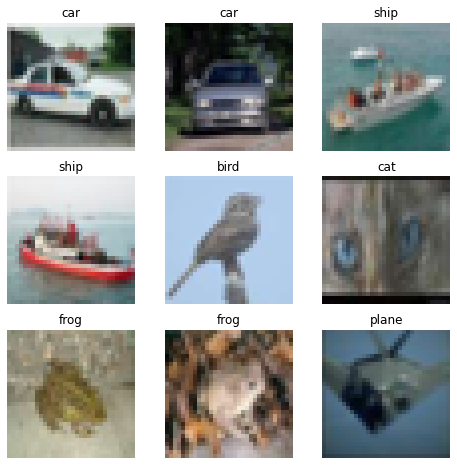

In [8]:
train_dataloader = DataLoader(train_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)
# 辞書型変数にまとめると学習・検証の実施時に扱いやすくなる
dataloaders_dict = {"train" : train_dataloader, "test" : test_dataloader}
# イテレータに変換
batch_iterator = iter(dataloaders_dict["train"])
# 要素を取り出す
imgs, labels = next(batch_iterator)
print("Image batch shape [batch_size : %d, color : %d, width : %d, height : %d]"
      % (imgs.size()[0], imgs.size()[1], imgs.size()[2], imgs.size()[3]))
print(f"Labels batch shape : {labels.size()[0]}")

# 訓練データの表示
figure = plt.figure(figsize = (8, 8))
rows, cols = 3, 3
for i in range(rows * cols):
    idx = torch.randint(low = 0, high = len(imgs), size = (1, 1)).item()
    # データの取得
    img, label = imgs[idx], labels[idx]
    figure.add_subplot(cols, rows, i + 1)
    plt.title(classes[label])
    plt.axis("off")
    plt.imshow(np.transpose(img.squeeze().numpy(), (1, 2, 0)))
plt.show()